Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Extracted Features from the Music Files and generated a CSV File

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import random
import soundfile as sf
import audioread

# Define dataset path
dataset_path = "/content/drive/MyDrive/Skipify/data"

# Define genres
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# List to store extracted features
data = []

# Process each genre folder
for genre in genres:
    genre_path = os.path.join(dataset_path, genre)

    for file in os.listdir(genre_path):
        if file.endswith(".wav"):
            file_path = os.path.join(genre_path, file)

            try:
                # Load the audio file (with exception handling)
                with audioread.audio_open(file_path) as f:
                    y, sr = librosa.load(file_path, sr=None)

                # 1. Temporal Features
                tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
                zcr = np.mean(librosa.feature.zero_crossing_rate(y))
                rmse = np.mean(librosa.feature.rms(y=y))

                # 2. Spectral Features
                spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
                spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
                spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
                spectral_flatness = np.mean(librosa.feature.spectral_flatness(y=y))

                # 3. Rhythmic Features
                onset_env = librosa.onset.onset_strength(y=y, sr=sr)
                onset_strength = np.mean(onset_env)
                beats_per_segment = len(librosa.beat.beat_track(y=y, sr=sr)[1])
                hnr = np.mean(librosa.effects.harmonic(y))

                # 4. Tonal Features
                chroma = librosa.feature.chroma_stft(y=y, sr=sr)
                key = np.argmax(np.mean(chroma, axis=1))  # Approximate key detection
                mode = 1 if key in [0, 2, 4, 5, 7, 9, 11] else 0  # Major = 1, Minor = 0
                tonnetz = np.mean(librosa.feature.tonnetz(y=y, sr=sr), axis=1)  # Tonal centroid features

                # 5. High-Level Features
                timbre = np.mean(librosa.feature.tempogram(y=y, sr=sr))
                danceability = np.mean(onset_env) / np.std(onset_env) if np.std(onset_env) != 0 else 0
                valence = np.mean(spectral_centroid) / np.max(spectral_centroid) if np.max(spectral_centroid) != 0 else 0
                instrumentalness = 1 - np.mean(chroma)  # Approximate instrumental measure
                acousticness = np.mean(1 - spectral_flatness)  # Higher = more acoustic

                # MFCCs (13 coefficients)
                mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
                spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)

                # Append extracted features
                features = [file, genre, tempo, zcr, rmse, spectral_centroid, spectral_bandwidth, spectral_rolloff, spectral_flatness,
                            onset_strength, beats_per_segment, hnr, key, mode, timbre, danceability, valence, instrumentalness, acousticness] \
                            + list(mfccs) + list(chroma.mean(axis=1)) + list(spectral_contrast) + list(tonnetz)

                data.append(features)

            except Exception as e:
                print(f"Error processing {file_path}: {e}")
                continue  # Skip the problematic file

# Shuffle the dataset for diversity
random.shuffle(data)

# Define column names
columns = ['File', 'Genre', 'Tempo', 'Zero_Crossing_Rate', 'RMSE', 'Spectral_Centroid', 'Spectral_Bandwidth', 'Spectral_Rolloff', 'Spectral_Flatness',
           'Onset_Strength', 'Beats_Per_Segment', 'Harmonic-to-Noise', 'Key', 'Mode', 'Timbre', 'Danceability', 'Valence', 'Instrumentalness', 'Acousticness']

# Add column names for MFCCs, Chroma, Spectral Contrast, and Tonnetz
columns += [f'MFCC_{i+1}' for i in range(13)]
columns += [f'Chroma_{i+1}' for i in range(12)]
columns += [f'Spectral_Contrast_{i+1}' for i in range(7)]
columns += [f'Tonnetz_{i+1}' for i in range(6)]

# Convert to DataFrame
df = pd.DataFrame(data, columns=columns)

# Add an index column starting from 1
df.insert(0, "Index", range(1, len(df) + 1))

# Save as CSV
df.to_csv("audio_features.csv", index=False)

print("Feature extraction completed and saved to audio_features.csv")

Reading the audio_features csv file and creating a Dataframe

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/audio_features.csv")

Checking for Missing Values

In [ ]:
missing_values=df.isnull().sum()
print(missing_values)

Index                  0
File                   0
Genre                  0
Tempo                  0
Zero_Crossing_Rate     0
RMSE                   0
Spectral_Centroid      0
Spectral_Bandwidth     0
Spectral_Rolloff       0
Spectral_Flatness      0
Onset_Strength         0
Beats_Per_Segment      0
Harmonic-to-Noise      0
Key                    0
Mode                   0
Timbre                 0
Danceability           0
Valence                0
Instrumentalness       0
Acousticness           0
MFCC_1                 0
MFCC_2                 0
MFCC_3                 0
MFCC_4                 0
MFCC_5                 0
MFCC_6                 0
MFCC_7                 0
MFCC_8                 0
MFCC_9                 0
MFCC_10                0
MFCC_11                0
MFCC_12                0
MFCC_13                0
Chroma_1               0
Chroma_2               0
Chroma_3               0
Chroma_4               0
Chroma_5               0
Chroma_6               0
Chroma_7               0


Checking all column types

In [ ]:
# Get column data types
column_types = df.dtypes

# Print all column types
print(column_types)

Index                    int64
File                    object
Genre                   object
Tempo                   object
Zero_Crossing_Rate     float64
RMSE                   float64
Spectral_Centroid      float64
Spectral_Bandwidth     float64
Spectral_Rolloff       float64
Spectral_Flatness      float64
Onset_Strength         float64
Beats_Per_Segment        int64
Harmonic-to-Noise      float64
Key                      int64
Mode                     int64
Timbre                 float64
Danceability           float64
Valence                float64
Instrumentalness       float64
Acousticness           float64
MFCC_1                 float64
MFCC_2                 float64
MFCC_3                 float64
MFCC_4                 float64
MFCC_5                 float64
MFCC_6                 float64
MFCC_7                 float64
MFCC_8                 float64
MFCC_9                 float64
MFCC_10                float64
MFCC_11                float64
MFCC_12                float64
MFCC_13 

Drop the File, Index and Genre Column as it's not necessary

In [ ]:
df.drop(columns=['File'], inplace=True)
df.drop(columns=['Index'], inplace=True)
df.drop(columns=['Genre'], inplace=True)

Checking the Tempo Column

In [ ]:
column_name = 'Tempo'

# Print the first 10 values of the specified column
print(f"First 10 values of '{column_name}':")
print(df[column_name].head(10))

First 10 values of 'Tempo':
0      [103.359375]
1       [95.703125]
2      [123.046875]
3       [95.703125]
4    [129.19921875]
5    [112.34714674]
6     [92.28515625]
7     [89.10290948]
8    [161.49902344]
9      [123.046875]
Name: Tempo, dtype: object


Converting the Tempo column values to numeric values

In [ ]:
# Handle values that are strings representing lists
def convert_to_float(x):
    if isinstance(x, str) and x.startswith('[') and x.endswith(']'):
        # Remove the brackets and convert to float
        return float(x.strip('[]'))
    elif isinstance(x, list):
        # If it's actually a list, take the first element
        return float(x[0])
    else:
        # Otherwise try direct conversion
        return float(x)

# Apply the conversion function
df['Tempo'] = df['Tempo'].apply(convert_to_float)

# Verify the conversion worked
print(df['Tempo'].head(10))
print("Data type:", df['Tempo'].dtype)

0    103.359375
1     95.703125
2    123.046875
3     95.703125
4    129.199219
5    112.347147
6     92.285156
7     89.102909
8    161.499023
9    123.046875
Name: Tempo, dtype: float64
Data type: float64


Checking all column types again

In [ ]:
# Get column data types
column_types = df.dtypes

# Print all column types
print(column_types)

Tempo                  float64
Zero_Crossing_Rate     float64
RMSE                   float64
Spectral_Centroid      float64
Spectral_Bandwidth     float64
Spectral_Rolloff       float64
Spectral_Flatness      float64
Onset_Strength         float64
Beats_Per_Segment        int64
Harmonic-to-Noise      float64
Key                      int64
Mode                     int64
Timbre                 float64
Danceability           float64
Valence                float64
Instrumentalness       float64
Acousticness           float64
MFCC_1                 float64
MFCC_2                 float64
MFCC_3                 float64
MFCC_4                 float64
MFCC_5                 float64
MFCC_6                 float64
MFCC_7                 float64
MFCC_8                 float64
MFCC_9                 float64
MFCC_10                float64
MFCC_11                float64
MFCC_12                float64
MFCC_13                float64
Chroma_1               float64
Chroma_2               float64
Chroma_3

Saving this preprocessed data into a new csv file

In [ ]:
df.to_csv('audio_features_preprocess.csv', index=False)

Skip Labeling

In [ ]:
import pandas as pd

# Load the dataset
audio_df = pd.read_csv("audio_features_preprocess.csv")

# Define listener rule functions
def casual_listener(row):
    return 0 if row['Danceability'] < 0.5 or row['RMSE'] < 0.1 or row['Onset_Strength'] < 0.3 else 1

def party_listener(row):
    return 0 if row['Tempo'] < 110 or row['Valence'] < 0.6 or row['Danceability'] < 0.6 else 1

def focus_listener(row):
    return 0 if row['Spectral_Centroid'] > 3500 or row['Beats_Per_Segment'] > 35 or row['Timbre'] > 0.6 else 1

def adventurous_listener(row):
    return 0 if row['Acousticness'] < 0.3 and row['Instrumentalness'] < 0.2 and row['Valence'] < 0.4 else 1

# Apply rules and add to dataframe
audio_df['casual_listener'] = audio_df.apply(casual_listener, axis=1)
audio_df['party_listener'] = audio_df.apply(party_listener, axis=1)
audio_df['focus_listener'] = audio_df.apply(focus_listener, axis=1)
audio_df['adventurous_listener'] = audio_df.apply(adventurous_listener, axis=1)

# Save the result
audio_df.to_csv("audio_features_with_skip_labels.csv", index=False)

print("Labels for all 4 listener types added and encoded (0=skip, 1=not skip).")

Labels for all 4 listener types added and encoded (0=skip, 1=not skip).


Training using a basic Feed-Forward Nueral Network

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping

# Load data
df_model_1 = pd.read_csv("audio_features_with_skip_labels.csv")

# Split features and labels
X = df_model_1.iloc[:, :-4]
y = df_model_1.iloc[:, -4:]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Build improved model
model = Sequential([
    Input(shape=(X_train.shape[1],)), # this layer is for feature dimensions which is matching shapes
    Dense(256, activation='relu'), # This is for learning patterns
    BatchNormalization(), # This is for batch normalization
    Dropout(0.4), # This is used to prevent overfitting
    Dense(128, activation='relu'), #patterns
    BatchNormalization(), #patterns
    Dropout(0.3), #patterns
    Dense(64, activation='relu'), #patterns
    Dropout(0.2), #patterns
    Dense(4, activation='sigmoid')  #for output function
])

# Compile model with better metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Precision(name="precision"),
                       tf.keras.metrics.Recall(name="recall")])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

# Evaluate on test data
results = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {results[0]:.4f}")
print(f"Test Precision: {results[1]:.4f}")
print(f"Test Recall: {results[2]:.4f}")

# Predict and convert probabilities to binary 0/1
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification report
print("\nClassification Report (per category):")
print(classification_report(y_test, y_pred, target_names=y.columns))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.6068 - precision: 0.7402 - recall: 0.6723 - val_loss: 0.5212 - val_precision: 0.8532 - val_recall: 0.9387
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3755 - precision: 0.8919 - recall: 0.8573 - val_loss: 0.4479 - val_precision: 0.8727 - val_recall: 0.9164
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2982 - precision: 0.8874 - recall: 0.8831 - val_loss: 0.3717 - val_precision: 0.8874 - val_recall: 0.9220
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2723 - precision: 0.8993 - recall: 0.8886 - val_loss: 0.3153 - val_precision: 0.8978 - val_recall: 0.9304
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2148 - precision: 0.9395 - recall: 0.9082 - val_loss: 0.2681 - val_precision: 0.9081 - val_recall: 0.9359
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1906 - precision: 0.9300 - recall: 0.9387 - val_loss: 0.2362 - val_precision: 0.9111 - val_recall: 0.9


Test Loss: 0.1325
Test Precision: 0.9533
Test Recall: 0.9615
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

Classification Report (per category):
                      precision    recall  f1-score   support

     casual_listener       0.96      0.93      0.95       146
      party_listener       0.90      0.95      0.92       110
      focus_listener       0.60      0.82      0.69        11
adventurous_listener       1.00      1.00      1.00       200

           micro avg       0.95      0.96      0.96       467
           macro avg       0.87      0.92      0.89       467
        weighted avg       0.96      0.96      0.96       467
         samples avg       0.95      0.96      0.95       467



Model Evaluation and Visualization

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

                              MODEL PERFORMANCE SUMMARY

Overall Metrics:
   Test Loss:      0.1325
   Test Precision: 0.9533
   Test Recall:    0.9615
   Test F1 Score:  0.9574

Training Summary:
   Total Epochs:        20
   Best Validation Loss: 0.1345

Per-Class Performance:
                      Precision  Recall  F1-Score  Support
casual_listener          0.9645  0.9315    0.9477    146.0
party_listener           0.9043  0.9455    0.9244    110.0
focus_listener           0.6000  0.8182    0.6923     11.0
adventurous_listener     1.0000  1.0000    1.0000    200.0

Average Precision Scores (Area under PR curve):
   casual_listener: 0.9925
   party_listener: 0.9660
   focus_listener: 0.8381
   adventurous_listener: 1.0000

ROC AUC Scores:
   casual_listener: 0.9796
   party_listener: 0.9627
   focus_listener: 0.9702
   adventurous_listener: N/A (single class in test set)


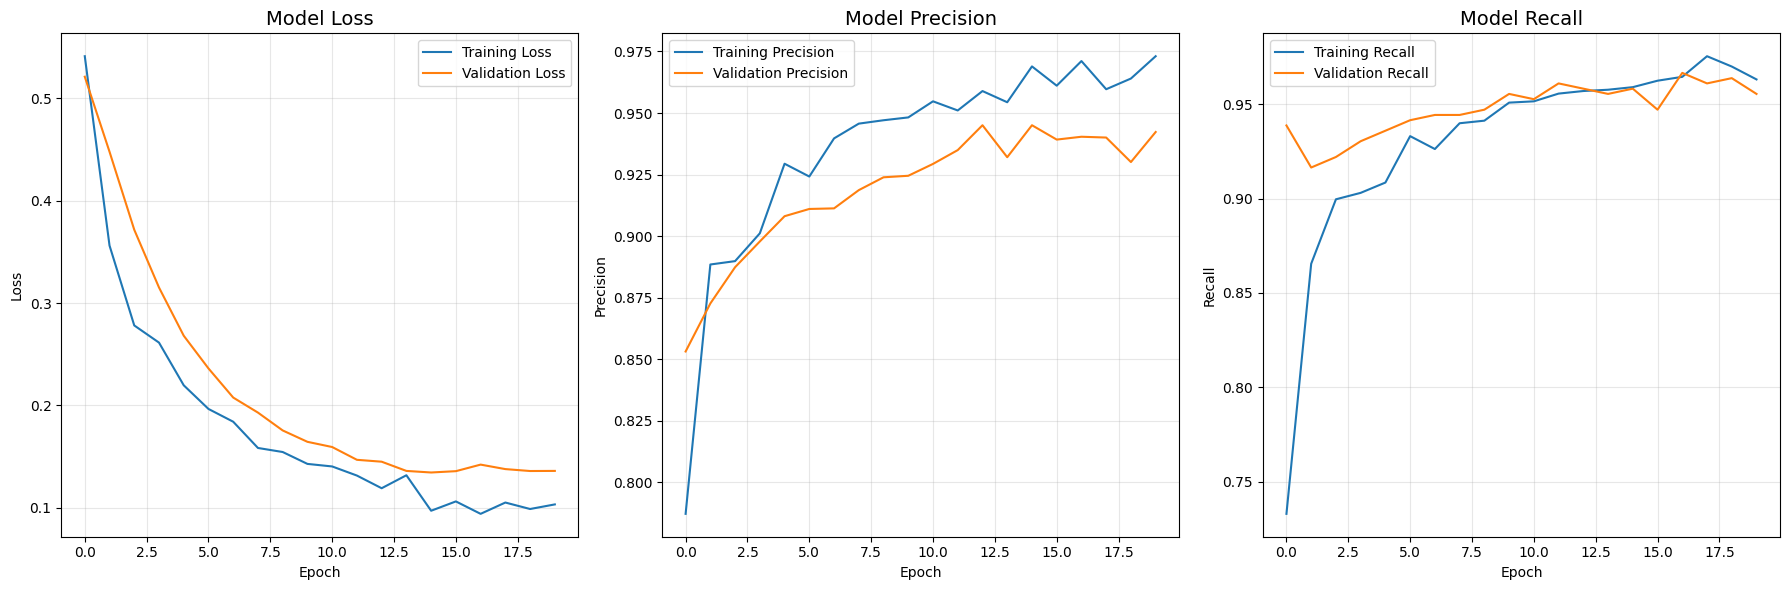

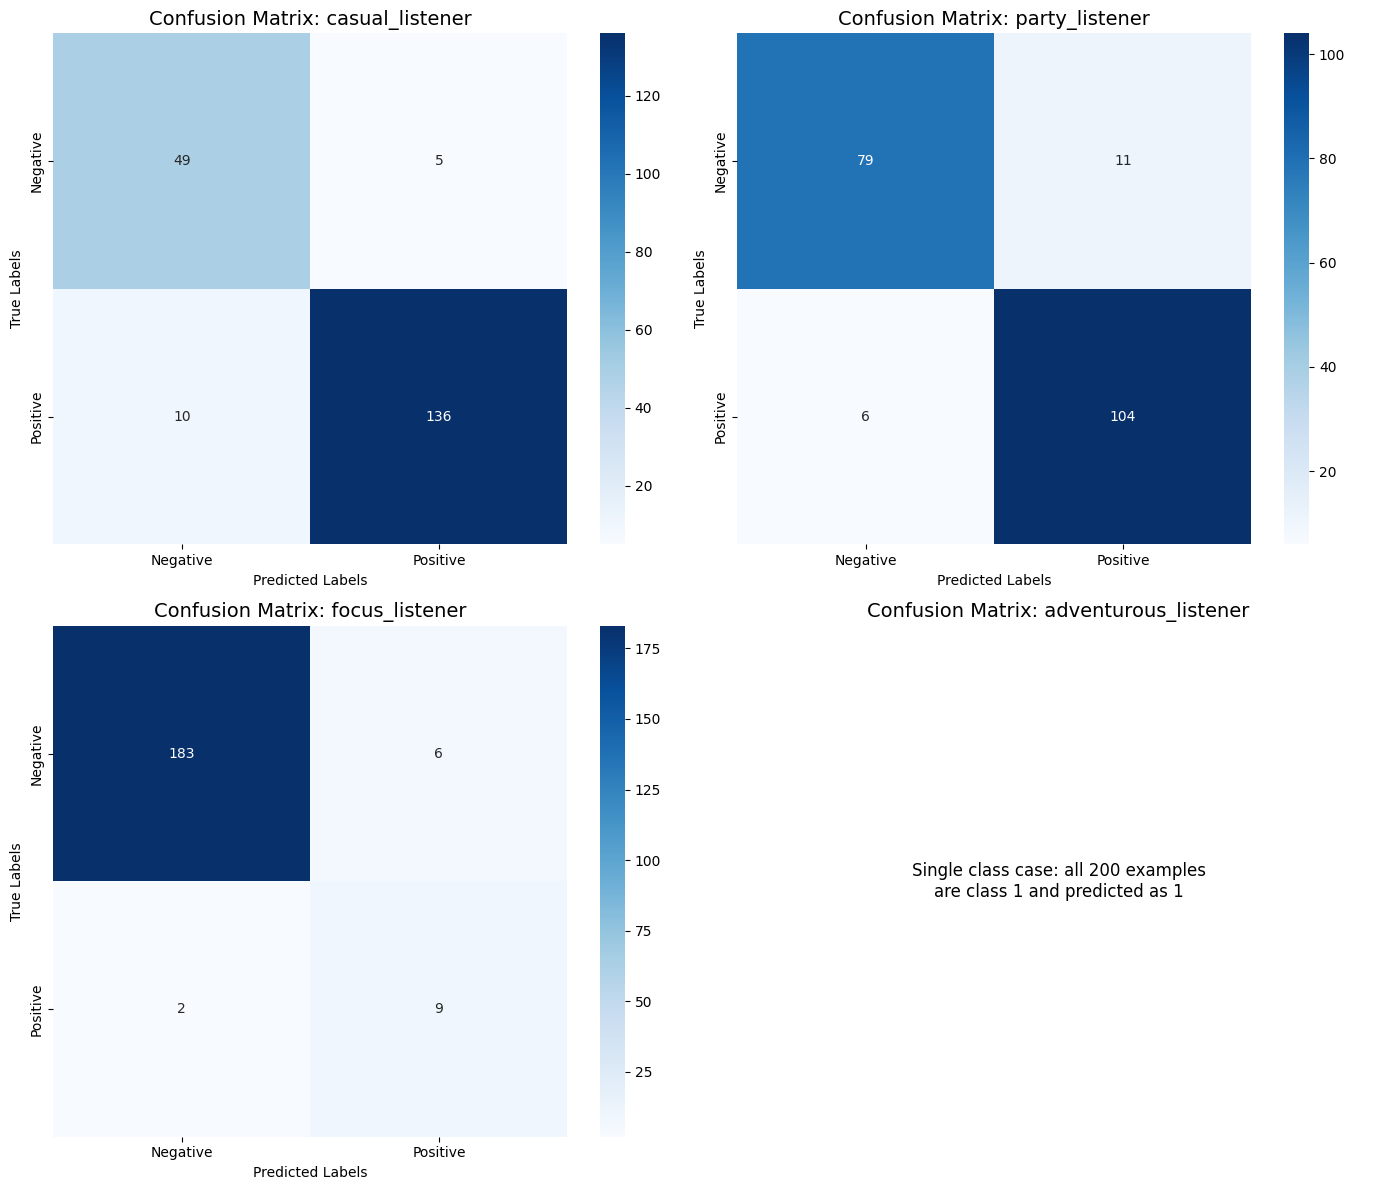

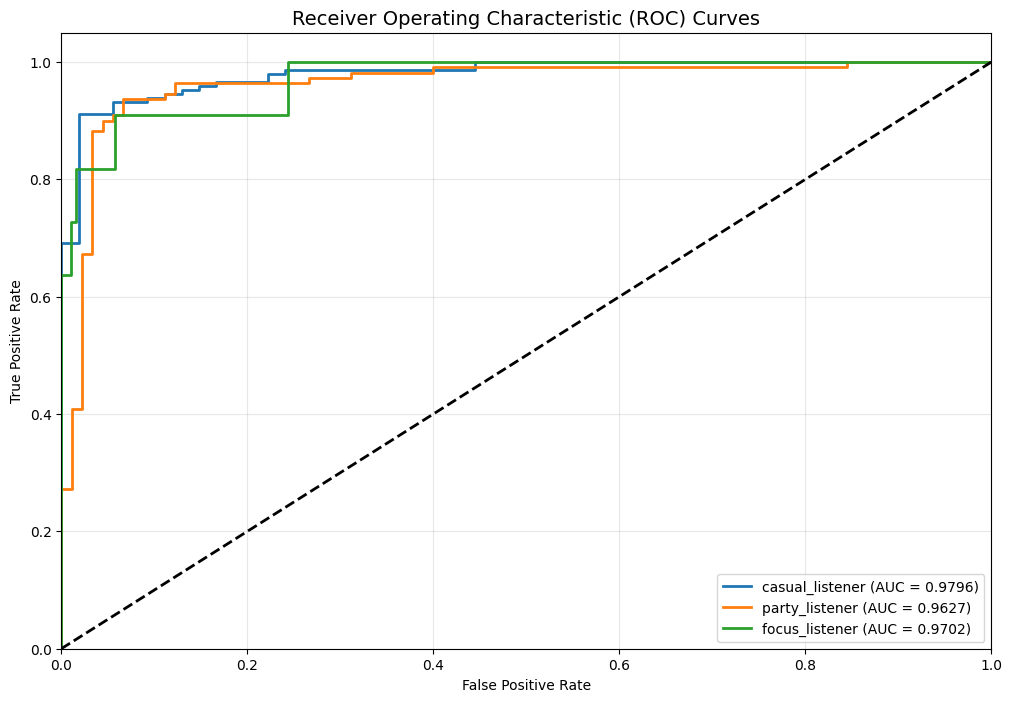

Skipping PR curve for adventurous_listener: only one class present


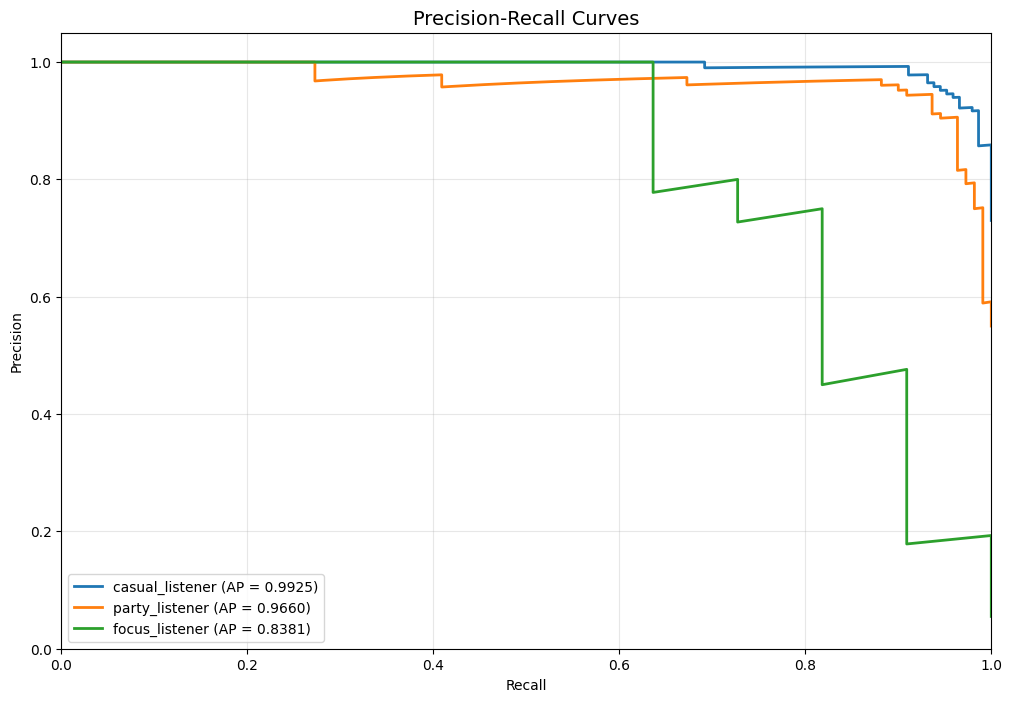

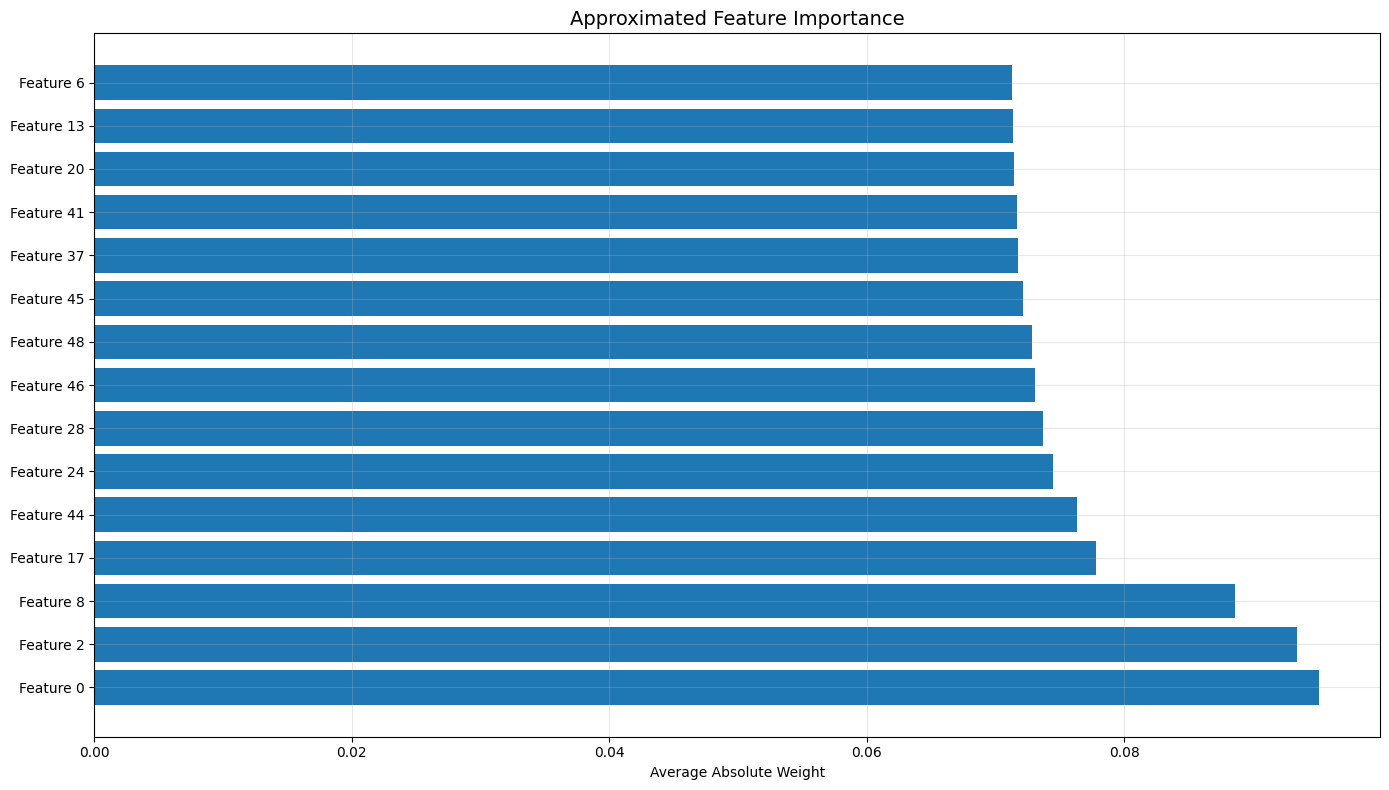

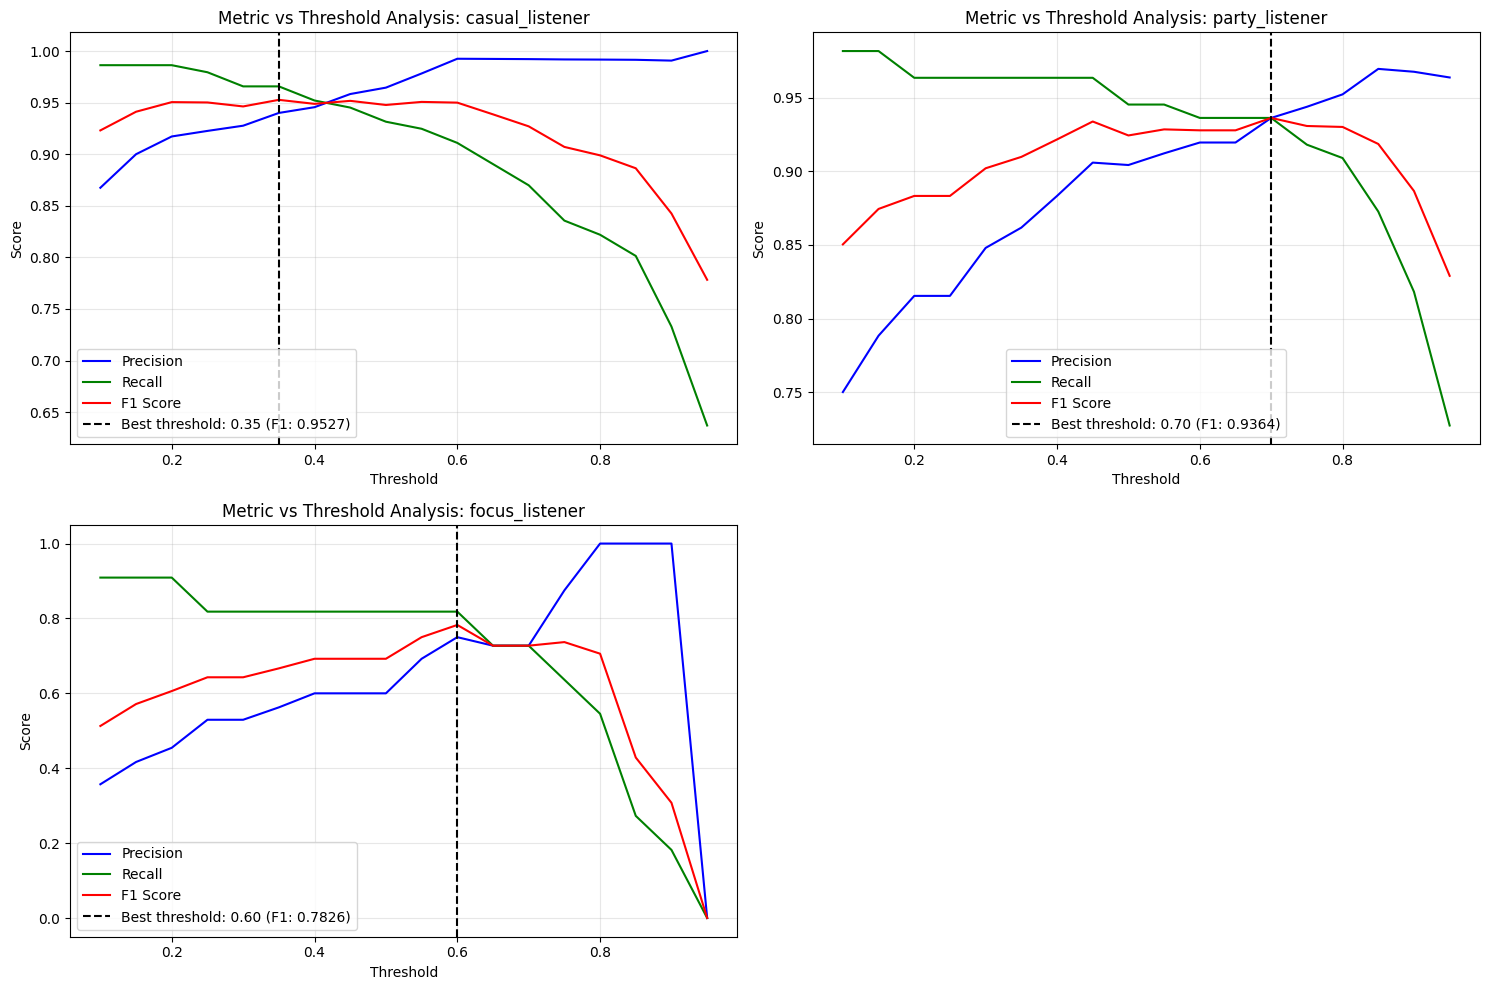


Recommended Decision Thresholds for Optimal F1 Score:
   casual_listener: 0.53 (F1: 0.9544)
   party_listener: 0.69 (F1: 0.9364)
   focus_listener: 0.59 (F1: 0.7826)
   adventurous_listener: N/A (single class in test set)

Top Multi-label Misclassifications:
Index    Misclassified Labels True Labels                              Predicted Labels                        
----------------------------------------------------------------------------------------------------
4        2                    casual_listener, adventurous_listener    focus_listener, adventurous_listener    
32       2                    party_listener, adventurous_listener     casual_listener, adventurous_listener   
123      2                    casual_listener, adventurous_listener    party_listener, adventurous_listener    
187      2                    party_listener, adventurous_listener     focus_listener, adventurous_listener    
30       1                    casual_listener, party_listener, adventurous_list

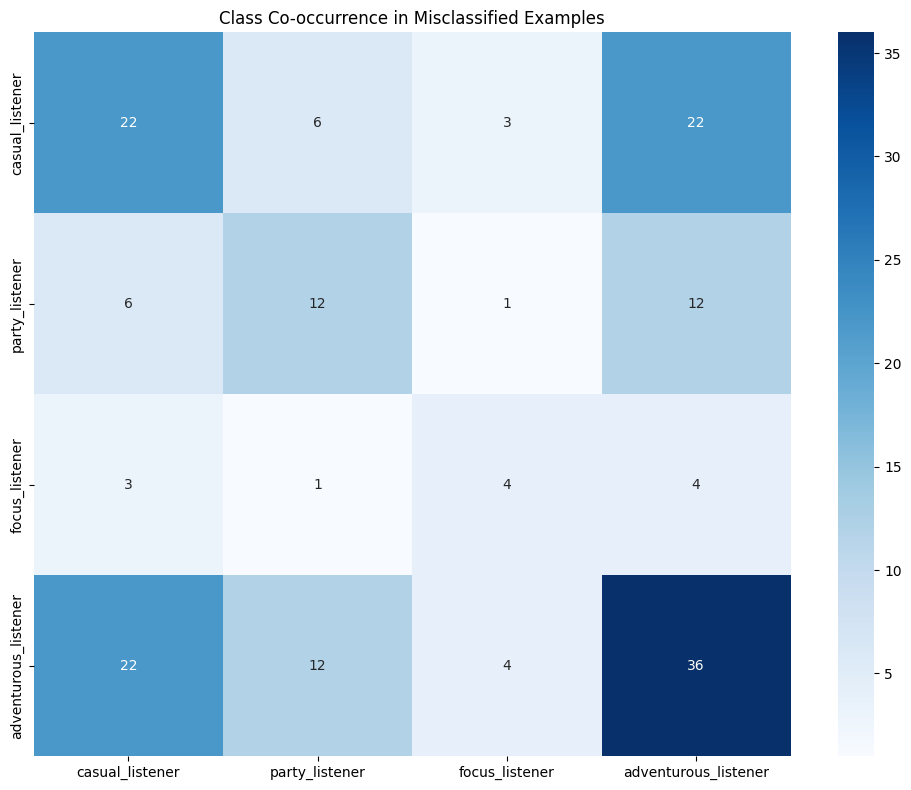

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np
import pandas as pd
import warnings

# Suppress specific sklearn warnings
warnings.filterwarnings("ignore", category=UserWarning)

def visualize_model_performance(model, history, X_test, y_test, class_names):
    """
    Comprehensive visualization of model performance including:
    - Training history plots
    - Confusion matrices
    - ROC curves
    - Precision-Recall curves
    - Feature importance (approximated)

    Args:
        model: Trained Keras model
        history: Training history object
        X_test: Test features
        y_test: Test labels
        class_names: Names of the output classes
    """
    # Get predictions
    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Print summary statistics
    print_summary_statistics(model, history, X_test, y_test, y_pred, y_pred_probs, class_names)

    # Plot training history
    plot_training_history(history)

    # Plot confusion matrices
    plot_confusion_matrices(y_test, y_pred, class_names)

    # Plot ROC curves
    plot_roc_curves(y_test, y_pred_probs, class_names)

    # Plot Precision-Recall curves
    plot_precision_recall_curves(y_test, y_pred_probs, class_names)

    # Approximate feature importance
    plot_feature_importance(model, X_test, class_names)


def print_summary_statistics(model, history, X_test, y_test, y_pred, y_pred_probs, class_names):
    """Print comprehensive summary statistics"""
    # Overall model evaluation
    results = model.evaluate(X_test, y_test, verbose=0)

    print("\n" + "="*80)
    print(" "*30 + "MODEL PERFORMANCE SUMMARY")
    print("="*80)

    print(f"\nOverall Metrics:")
    print(f"   Test Loss:      {results[0]:.4f}")
    print(f"   Test Precision: {results[1]:.4f}")
    print(f"   Test Recall:    {results[2]:.4f}")

    # Calculate F1 score manually
    f1 = 2 * (results[1] * results[2]) / (results[1] + results[2] + 1e-10)
    print(f"   Test F1 Score:  {f1:.4f}")

    # Training history summary
    val_loss = min(history.history['val_loss'])
    epochs_used = len(history.history['loss'])
    print(f"\nTraining Summary:")
    print(f"   Total Epochs:        {epochs_used}")
    print(f"   Best Validation Loss: {val_loss:.4f}")

    # Per-class metrics
    print("\nPer-Class Performance:")
    report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

    # Create a DataFrame for better formatting
    metrics_df = pd.DataFrame({
        'Precision': [report[label]['precision'] for label in class_names],
        'Recall': [report[label]['recall'] for label in class_names],
        'F1-Score': [report[label]['f1-score'] for label in class_names],
        'Support': [report[label]['support'] for label in class_names]
    }, index=class_names)

    print(metrics_df.round(4).to_string())

    # Average precision scores
    print("\nAverage Precision Scores (Area under PR curve):")
    for i, class_name in enumerate(class_names):
        avg_precision = average_precision_score(y_test.iloc[:, i], y_pred_probs[:, i])
        print(f"   {class_name}: {avg_precision:.4f}")

    # ROC AUC scores
    print("\nROC AUC Scores:")
    for i, class_name in enumerate(class_names):
        # Check if we have both positive and negative samples
        unique_labels = np.unique(y_test.iloc[:, i])
        if len(unique_labels) < 2:
            print(f"   {class_name}: N/A (single class in test set)")
        else:
            try:
                roc_auc = auc(*roc_curve(y_test.iloc[:, i], y_pred_probs[:, i])[:2])
                print(f"   {class_name}: {roc_auc:.4f}")
            except Exception as e:
                print(f"   {class_name}: Error calculating ROC AUC - {str(e)}")


def plot_training_history(history):
    """Plot the training and validation metrics"""
    plt.figure(figsize=(18, 6))

    # Plot loss
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss', fontsize=14)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot precision
    plt.subplot(1, 3, 2)
    plt.plot(history.history['precision'], label='Training Precision')
    plt.plot(history.history['val_precision'], label='Validation Precision')
    plt.title('Model Precision', fontsize=14)
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot recall
    plt.subplot(1, 3, 3)
    plt.plot(history.history['recall'], label='Training Recall')
    plt.plot(history.history['val_recall'], label='Validation Recall')
    plt.title('Model Recall', fontsize=14)
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_confusion_matrices(y_test, y_pred, class_names):
    """Plot confusion matrices for each class (since it's multi-label)"""
    n_classes = len(class_names)
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    axes = axes.flatten()

    for i in range(n_classes):
        # Get true and predicted labels for this class
        true_labels = y_test.iloc[:, i].values
        pred_labels = y_pred[:, i]

        # Check if we have a degenerate case (all same value)
        unique_true = np.unique(true_labels)
        unique_pred = np.unique(pred_labels)

        ax = axes[i]

        if len(unique_true) == 1 and len(unique_pred) == 1:
            # Special case - only one class present
            ax.text(0.5, 0.5, f"Single class case: all {len(true_labels)} examples\nare class {unique_true[0]} and predicted as {unique_pred[0]}",
                    horizontalalignment='center', verticalalignment='center', fontsize=12)
            ax.set_title(f'Confusion Matrix: {class_names[i]}', fontsize=14)
            ax.axis('off')
        else:
            # Ensure we have a proper 2x2 matrix by forcing the labels
            cm = confusion_matrix(true_labels, pred_labels, labels=[0, 1])
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
            ax.set_title(f'Confusion Matrix: {class_names[i]}', fontsize=14)
            ax.set_xlabel('Predicted Labels')
            ax.set_ylabel('True Labels')
            ax.set_xticklabels(['Negative', 'Positive'])
            ax.set_yticklabels(['Negative', 'Positive'])

    plt.tight_layout()
    plt.show()


def plot_roc_curves(y_test, y_pred_probs, class_names):
    """Plot ROC curves for each class"""
    plt.figure(figsize=(12, 8))

    for i, class_name in enumerate(class_names):
        # Check if we have both positive and negative samples
        unique_labels = np.unique(y_test.iloc[:, i])

        if len(unique_labels) < 2:
            continue  # Skip this class for ROC curve

        try:
            fpr, tpr, _ = roc_curve(y_test.iloc[:, i], y_pred_probs[:, i])
            roc_auc = auc(fpr, tpr)

            plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.4f})')
        except Exception as e:
            print(f"Skipping ROC curve for {class_name}: {str(e)}")

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=14)
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()


def plot_precision_recall_curves(y_test, y_pred_probs, class_names):
    """Plot Precision-Recall curves for each class"""
    plt.figure(figsize=(12, 8))

    for i, class_name in enumerate(class_names):
        # Check if we have both positive and negative samples
        unique_labels = np.unique(y_test.iloc[:, i])

        if len(unique_labels) < 2:
            print(f"Skipping PR curve for {class_name}: only one class present")
            continue  # Skip this class for PR curve

        try:
            precision, recall, _ = precision_recall_curve(y_test.iloc[:, i], y_pred_probs[:, i])
            avg_precision = average_precision_score(y_test.iloc[:, i], y_pred_probs[:, i])

            plt.plot(recall, precision, lw=2, label=f'{class_name} (AP = {avg_precision:.4f})')
        except Exception as e:
            print(f"Skipping PR curve for {class_name}: {str(e)}")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves', fontsize=14)
    plt.legend(loc="best")
    plt.grid(True, alpha=0.3)
    plt.show()


def plot_feature_importance(model, X_test, class_names):
    """
    Approximate feature importance for neural networks

    Note: This isn't straightforward for neural networks like it is for tree-based models.
    We'll use a simple weight-based approach.
    """
    # Get the input layer weights (first layer)
    weights = model.layers[0].get_weights()[0]
    importance = np.abs(weights).mean(axis=1)

    # Sort importance
    sorted_idx = importance.argsort()

    # Get top 15 features
    top_n = min(15, len(sorted_idx))
    top_idx = sorted_idx[-top_n:]
    top_importance = importance[top_idx]

    # Get feature names (if available) or use indices
    try:
        if hasattr(X_test, 'columns'):
            feature_names = [X_test.columns[i] for i in top_idx]
        else:
            feature_names = [f"Feature {i}" for i in top_idx]
    except:
        feature_names = [f"Feature {i}" for i in top_idx]

    # Plot
    plt.figure(figsize=(14, 8))
    plt.barh(range(top_n), top_importance, align='center')
    plt.yticks(range(top_n), feature_names)
    plt.xlabel('Average Absolute Weight')
    plt.title('Approximated Feature Importance', fontsize=14)
    plt.gca().invert_yaxis()  # To have the highest importance at the top
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


# Call the main visualization function
visualize_model_performance(model, history, X_test, y_test, y.columns)


# Additional analysis: Threshold optimization
def plot_threshold_analysis(y_test, y_pred_probs, class_names):
    """
    Analyze the effect of different decision thresholds on precision, recall and F1
    """
    plt.figure(figsize=(15, 10))

    for i, class_name in enumerate(class_names):
        # Check if we have both positive and negative samples
        unique_labels = np.unique(y_test.iloc[:, i])

        if len(unique_labels) < 2:
            continue  # Skip this class for threshold analysis

        true_labels = y_test.iloc[:, i]
        pred_probs = y_pred_probs[:, i]

        thresholds = np.arange(0.1, 1.0, 0.05)
        precisions = []
        recalls = []
        f1_scores = []

        for threshold in thresholds:
            y_pred_i = (pred_probs >= threshold).astype(int)

            # Calculate metrics
            tp = np.sum((y_pred_i == 1) & (true_labels == 1))
            fp = np.sum((y_pred_i == 1) & (true_labels == 0))
            fn = np.sum((y_pred_i == 0) & (true_labels == 1))

            precision = tp / (tp + fp + 1e-10)
            recall = tp / (tp + fn + 1e-10)
            f1 = 2 * precision * recall / (precision + recall + 1e-10)

            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1)

        plt.subplot(2, 2, i+1)
        plt.plot(thresholds, precisions, 'b-', label='Precision')
        plt.plot(thresholds, recalls, 'g-', label='Recall')
        plt.plot(thresholds, f1_scores, 'r-', label='F1 Score')

        # Find best F1 threshold
        best_idx = np.argmax(f1_scores)
        best_threshold = thresholds[best_idx]
        best_f1 = f1_scores[best_idx]

        plt.axvline(x=best_threshold, color='k', linestyle='--',
                   label=f'Best threshold: {best_threshold:.2f} (F1: {best_f1:.4f})')

        plt.xlabel('Threshold')
        plt.ylabel('Score')
        plt.title(f'Metric vs Threshold Analysis: {class_name}')
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print recommended thresholds
    print("\nRecommended Decision Thresholds for Optimal F1 Score:")
    for i, class_name in enumerate(class_names):
        # Check if we have both positive and negative samples
        unique_labels = np.unique(y_test.iloc[:, i])

        if len(unique_labels) < 2:
            print(f"   {class_name}: N/A (single class in test set)")
            continue

        true_labels = y_test.iloc[:, i]
        pred_probs = y_pred_probs[:, i]

        thresholds = np.arange(0.1, 1.0, 0.01)
        f1_scores = []

        for threshold in thresholds:
            y_pred_i = (pred_probs >= threshold).astype(int)

            # Calculate metrics
            tp = np.sum((y_pred_i == 1) & (true_labels == 1))
            fp = np.sum((y_pred_i == 1) & (true_labels == 0))
            fn = np.sum((y_pred_i == 0) & (true_labels == 1))

            precision = tp / (tp + fp + 1e-10)
            recall = tp / (tp + fn + 1e-10)
            f1 = 2 * precision * recall / (precision + recall + 1e-10)

            f1_scores.append(f1)

        best_idx = np.argmax(f1_scores)
        best_threshold = thresholds[best_idx]
        best_f1 = f1_scores[best_idx]

        print(f"   {class_name}: {best_threshold:.2f} (F1: {best_f1:.4f})")


# Call threshold analysis
plot_threshold_analysis(y_test, y_pred_probs, y.columns)


# Additional analysis: Misclassified examples
def analyze_misclassifications(X_test, y_test, y_pred, class_names):
    """Analyze which examples are commonly misclassified across multiple labels"""
    # Convert to DataFrame if not already
    if not isinstance(X_test, pd.DataFrame):
        X_test_df = pd.DataFrame(X_test)
    else:
        X_test_df = X_test

    misclassified_counts = np.zeros(len(y_test))

    for i in range(len(class_names)):
        true_labels = y_test.iloc[:, i].values
        pred_labels = y_pred[:, i]

        # Find misclassified examples
        misclassified = (true_labels != pred_labels)
        misclassified_counts += misclassified

    # Sort by number of misclassifications
    sorted_indices = np.argsort(-misclassified_counts)

    # Only proceed if we have misclassifications
    if np.sum(misclassified_counts) == 0:
        print("\nNo misclassifications found in the test set!")
        return

    print("\nTop Multi-label Misclassifications:")
    print(f"{'Index':<8} {'Misclassified Labels':<20} {'True Labels':<40} {'Predicted Labels':<40}")
    print("-" * 100)

    # Get top 10 misclassified examples
    for idx in sorted_indices[:10]:
        if misclassified_counts[idx] > 0:
            true_labels = y_test.iloc[idx].values
            pred_labels = y_pred[idx]

            true_classes = [class_names[i] for i in range(len(class_names)) if true_labels[i] == 1]
            pred_classes = [class_names[i] for i in range(len(class_names)) if pred_labels[i] == 1]

            misclassified_labels = int(misclassified_counts[idx])

            print(f"{idx:<8} {misclassified_labels:<20} {', '.join(true_classes):<40} {', '.join(pred_classes):<40}")

    # Show class co-occurrence matrix for misclassified examples
    plt.figure(figsize=(10, 8))

    # Only include examples with at least one misclassification
    misclassified_mask = misclassified_counts > 0
    if np.sum(misclassified_mask) > 0:
        y_test_misclassified = y_test.iloc[misclassified_mask]

        # Calculate co-occurrence
        co_occurrence = y_test_misclassified.T.dot(y_test_misclassified)

        # Plot co-occurrence
        sns.heatmap(co_occurrence, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names)
        plt.title('Class Co-occurrence in Misclassified Examples')
        plt.tight_layout()
        plt.show()
    else:
        plt.text(0.5, 0.5, "No misclassifications to analyze",
                 horizontalalignment='center', verticalalignment='center', fontsize=14)
        plt.axis('off')
        plt.show()


# Call misclassification analysis
analyze_misclassifications(X_test, y_test, y_pred, y.columns)

Saving the Model

In [ ]:
# Save the entire model (architecture, weights, optimizer state)
model.save('spotify_skip_prediction_model.h5')
print("Model saved successfully to 'spotify_skip_prediction_model.h5'")

# If you just want to save the weights
model.save_weights('spotify_skip_prediction.weights.h5')
print("Model weights saved to 'spotify_skip_prediction_weights.h5'")

# To reload the model later:
# from tensorflow.keras.models import load_model
# loaded_model = load_model('spotify_skip_prediction_model.h5')

# Additional: Save the scaler for future preprocessing
import joblib
joblib.dump(scaler, 'feature_scaler.pkl')
print("Feature scaler saved to 'feature_scaler.pkl'")

# Example of how to use the saved model and scaler for predictions
"""
import joblib
from tensorflow.keras.models import load_model

# Load the model and scaler
loaded_model = load_model('spotify_skip_prediction_model.h5')
loaded_scaler = joblib.load('feature_scaler.pkl')

# Preprocess new data
new_data = ... # your new data
new_data_scaled = loaded_scaler.transform(new_data)

# Make predictions
predictions = loaded_model.predict(new_data_scaled)
binary_predictions = (predictions > 0.5).astype(int)
"""

Model saved successfully to 'spotify_skip_prediction_model.h5'
Model weights saved to 'spotify_skip_prediction_weights.h5'
Feature scaler saved to 'feature_scaler.pkl'


"\nimport joblib\nfrom tensorflow.keras.models import load_model\n\n# Load the model and scaler\nloaded_model = load_model('spotify_skip_prediction_model.h5')\nloaded_scaler = joblib.load('feature_scaler.pkl')\n\n# Preprocess new data\nnew_data = ... # your new data\nnew_data_scaled = loaded_scaler.transform(new_data)\n\n# Make predictions\npredictions = loaded_model.predict(new_data_scaled)\nbinary_predictions = (predictions > 0.5).astype(int)\n"